## Advice report to rookie developers, according StackOverflow's Survey 2020 dataset
1. (**57.56%** chance for job satisfaction) `Open your mind for new experiences and opportunities.`
1. (**73.55%** chance for job satisfaction) `Become a professional developer.`
1. (**70.61%** chance for job satisfaction) `Love your work and what you do as developer.`
1. (**70.90%** chance for job satisfaction) `Become a full-time developer.`
1. (**57.56%** chance for better salary) `Keep seeking for your dream job until you achieve it.`
1. (**73.55%** chance for better salary) `Professional developers earns better salaries.`
1. (**63.15%** chance for better salary) `Love what you work results in better salaries as developer.`
1. (**70.61%** chance for better salary) `New experiences provides better benefits and salaries.`
1. (**74.03%** chance for better salary) `Working as full-time developer earns better salaries.`

In [1]:
from itertools import combinations

import pandas as pd
from pandas.core.frame import DataFrame

import matplotlib.pyplot as mpl

%matplotlib inline

In [2]:
pd.set_option('max_columns', None)

In [3]:
df = pd.read_csv('../Datasets/survey_results_public.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

In [5]:
# These columns are not necessary for job satisfaction param calculation indeed
filter_list = [
    'Respondent',
    'Hobbyist',
    'ConvertedComp',
    'Age',
    'Age1stCode',
    'CompFreq',
    'Country',
    'CurrencyDesc',
    'CurrencySymbol',
    'DatabaseDesireNextYear',
    'DatabaseWorkedWith',
    'DevType',
    'Ethnicity',
    'Gender',
    'LanguageDesireNextYear',
    'LanguageWorkedWith',
    'MiscTechDesireNextYear',
    'MiscTechWorkedWith',
    'NEWCollabToolsDesireNextYear',
    'NEWCollabToolsWorkedWith',
    'NEWDevOps',
    'NEWDevOpsImpt',
    'NEWEdImpt',
    'NEWJobHunt',
    'NEWJobHuntResearch',
    'NEWLearn',
    'NEWOffTopic',
    'NEWOnboardGood',
    'NEWOtherComms',
    'NEWOvertime',
    'NEWPurchaseResearch',
    'NEWPurpleLink',
    'NEWSOSites',
    'NEWStuck',
    'OpSys',
    'PlatformDesireNextYear',
    'PlatformWorkedWith',
    'PurchaseWhat',
    'Sexuality',
    'SOAccount',
    'SOComm',
    'SOPartFreq',
    'SOVisitFreq',
    'SurveyEase',
    'SurveyLength',
    'Trans',
    'WebframeDesireNextYear',
    'WebframeWorkedWith',
]

In [6]:
def get_most_correlated_cols(df:DataFrame, col_ref:str, filters:list)\
->type(list):
    eligible_cols = []
    for col in df.columns.to_list():
        if col == col_ref\
            or filters.__contains__(col):
            continue
        amount = len(df[col].value_counts())
        eligible_cols.append((col, amount))
    eligible_cols.sort(key=lambda x : x[1])
    return eligible_cols[:5]

def display_most_correlated_cols(df:DataFrame, col:str)->type(None):
    print("\t---[[Most Correlated column: {}]]---".format(col))
    print(df[col].value_counts(), end='\n\n')

def crosstab_most_correlated_cols(df:DataFrame, col_ref:str, col_target:str)\
->type(None):
    n_df = pd.crosstab(df[col_ref], df[col_target])
    n_df.plot(kind='bar', stacked=True)
    mpl.title("Correlation between '{}' vs '{}'."\
         .format(col_ref, col_target))
    mpl.xlabel("")
    mpl.ylabel("Respondents")
    mpl.show()
    print('\n\n')

def perform_most_relevant_correlated_cols(df:DataFrame, col_ref:str, filters:list)\
->type(None):
    mccs = get_most_correlated_cols(df, col_ref, filter_list)
    for col, _ in mccs:
        display_most_correlated_cols(df, col)
        crosstab_most_correlated_cols(df, col, col_ref)

def relative_salary(salary:float)->type(str):
    if salary >= 100000.0:
        return "Above 100k/year"
    elif 75000.0 <= salary < 100000.0:
        return "75-100k/year"
    elif 50000.0 <= salary < 75000.0:
        return "50-75k/year"
    elif 25000.0 <= salary < 50000.0:
        return "25-50k/year"
    elif 12500.0 <= salary < 25000.0:
        return "12.5-25k/year"
    elif 7500.0 <= salary <= 12500.0:
        return "7.5-12.5k/year"
    else:
        return "Below 7.5k/year"

	---[[Most Correlated column: JobSeek]]---
I’m not actively looking, but I am open to new opportunities    29776
I am not interested in new job opportunities                    13001
I am actively looking for a job                                  8950
Name: JobSeek, dtype: int64



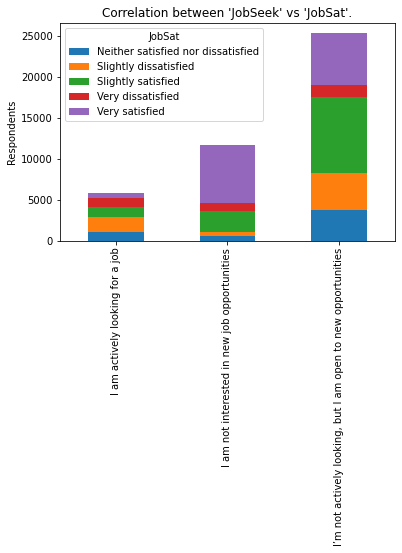




	---[[Most Correlated column: MainBranch]]---
I am a developer by profession                                                   47193
I am a student who is learning to code                                            7970
I am not primarily a developer, but I write code sometimes as part of my work     5502
I code primarily as a hobby                                                       2314
I used to be a developer by profession, but no longer am                          1183
Name: MainBranch, dtype: int64



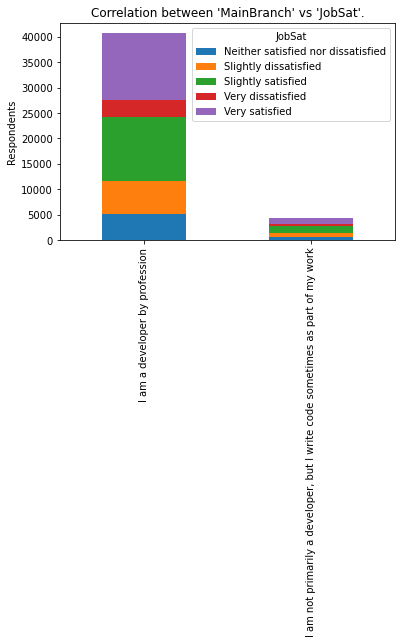




	---[[Most Correlated column: WelcomeChange]]---
Just as welcome now as I felt last year                    37201
Somewhat more welcome now than last year                    5020
A lot more welcome now than last year                       3205
Somewhat less welcome now than last year                    3095
A lot less welcome now than last year                       2131
Not applicable - I did not use Stack Overflow last year     2031
Name: WelcomeChange, dtype: int64



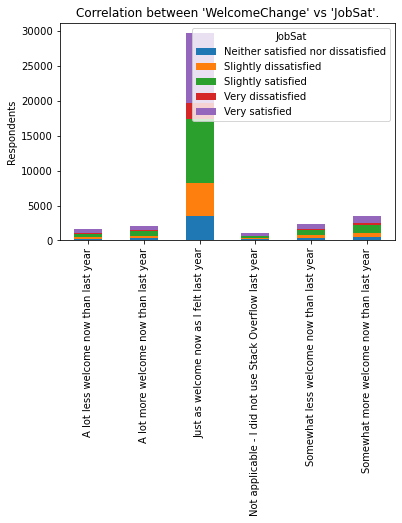




	---[[Most Correlated column: Employment]]---
Employed full-time                                      45270
Student                                                  7787
Independent contractor, freelancer, or self-employed     5672
Not employed, but looking for work                       2343
Employed part-time                                       2217
Not employed, and not looking for work                    322
Retired                                                   243
Name: Employment, dtype: int64



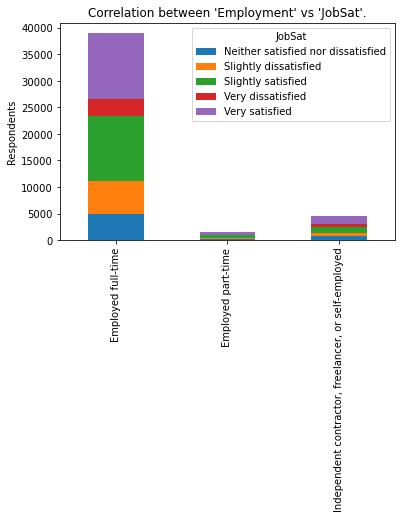




	---[[Most Correlated column: EdLevel]]---
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          26542
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       13112
Some college/university study without earning a degree                                 7239
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     4771
Associate degree (A.A., A.S., etc.)                                                    1843
Other doctoral degree (Ph.D., Ed.D., etc.)                                             1690
Primary/elementary school                                                               941
Professional degree (JD, MD, etc.)                                                      800
I never completed any formal education                                                  493
Name: EdLevel, dtype: int64



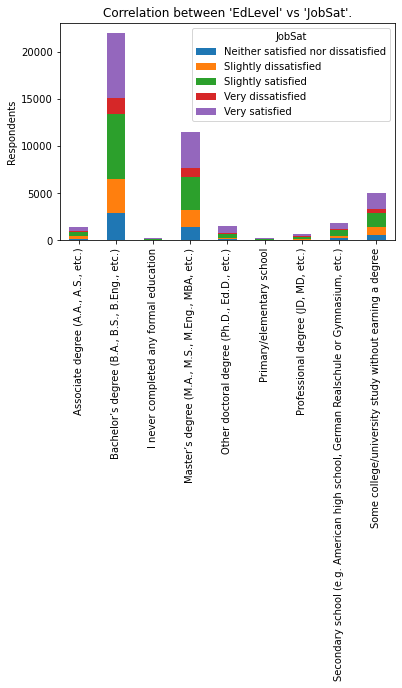

In [7]:
# 'Job Stafisfaction' using MCC detection
perform_most_relevant_correlated_cols(df, 'JobSat', filter_list)

In [8]:
df['Salary'] = df['ConvertedComp'].map(relative_salary)
df['Salary'].value_counts()

Below 7.5k/year    32455
Above 100k/year     8215
25-50k/year         7521
50-75k/year         6209
75-100k/year        4038
12.5-25k/year       3986
7.5-12.5k/year      2037
Name: Salary, dtype: int64

	---[[Most Correlated column: JobSeek]]---
I’m not actively looking, but I am open to new opportunities    29776
I am not interested in new job opportunities                    13001
I am actively looking for a job                                  8950
Name: JobSeek, dtype: int64



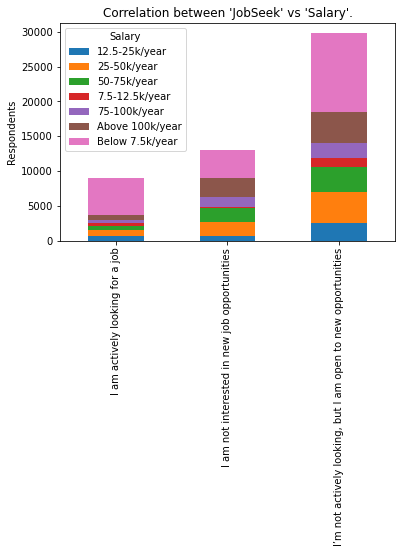




	---[[Most Correlated column: MainBranch]]---
I am a developer by profession                                                   47193
I am a student who is learning to code                                            7970
I am not primarily a developer, but I write code sometimes as part of my work     5502
I code primarily as a hobby                                                       2314
I used to be a developer by profession, but no longer am                          1183
Name: MainBranch, dtype: int64



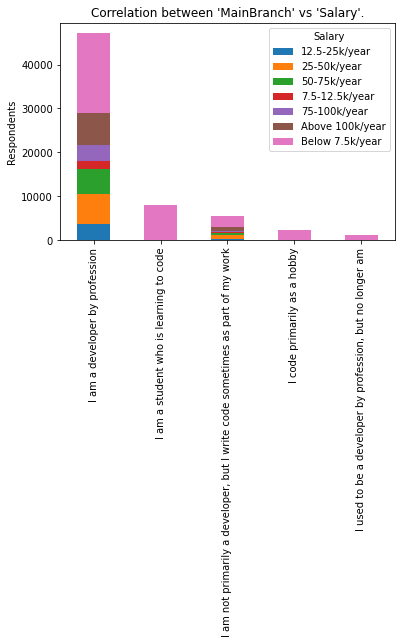




	---[[Most Correlated column: JobSat]]---
Very satisfied                        14611
Slightly satisfied                    13930
Slightly dissatisfied                  7124
Neither satisfied nor dissatisfied     5783
Very dissatisfied                      3746
Name: JobSat, dtype: int64



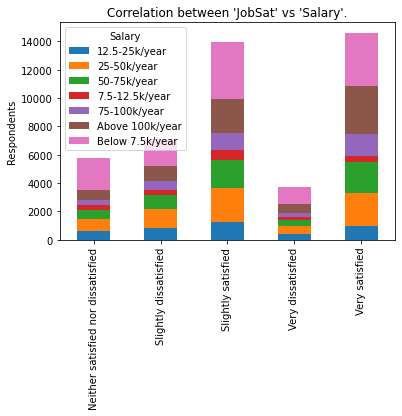




	---[[Most Correlated column: WelcomeChange]]---
Just as welcome now as I felt last year                    37201
Somewhat more welcome now than last year                    5020
A lot more welcome now than last year                       3205
Somewhat less welcome now than last year                    3095
A lot less welcome now than last year                       2131
Not applicable - I did not use Stack Overflow last year     2031
Name: WelcomeChange, dtype: int64



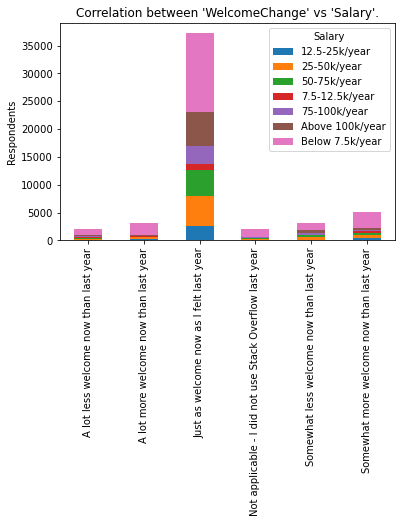




	---[[Most Correlated column: Employment]]---
Employed full-time                                      45270
Student                                                  7787
Independent contractor, freelancer, or self-employed     5672
Not employed, but looking for work                       2343
Employed part-time                                       2217
Not employed, and not looking for work                    322
Retired                                                   243
Name: Employment, dtype: int64



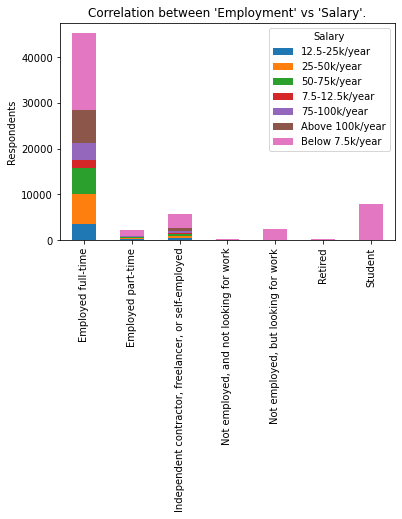

In [9]:
# 'Salary' using MCC detection
perform_most_relevant_correlated_cols(df, 'Salary', filter_list)